<a href="https://colab.research.google.com/github/arpit-parejiya01/Project/blob/main/CristianoRonaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np

import random
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_csv("/content/CR_data.csv") # reading data from the CSV file

In [ ]:
data.shape # checking how many rows and columns are in the data

(30697, 28)

In [ ]:
data.head() # seeing how the data looks like

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


# A. Data Preprocessing

#### 1. Exploring the Columns of Dataset

In [ ]:
# A. Using descriptive Statistics to find some insights
data.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [ ]:
# B. Finding the dtypes of Columns to get some Insights
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30697 non-null  int64  
 1   match_event_id         29134 non-null  float64
 2   location_x             29236 non-null  float64
 3   location_y             29157 non-null  float64
 4   remaining_min          29135 non-null  float64
 5   power_of_shot          29211 non-null  float64
 6   knockout_match         29180 non-null  float64
 7   game_season            24835 non-null  object 
 8   remaining_sec          29103 non-null  float64
 9   distance_of_shot       29130 non-null  float64
 10  is_goal                24429 non-null  float64
 11  area_of_shot           29195 non-null  object 
 12  shot_basics            29122 non-null  object 
 13  range_of_shot          29133 non-null  object 
 14  team_name              29162 non-null  object 
 15  da

#### 2. Checking for Missing Values

In [ ]:
# Percentage and Sum of Missing values in each Columns
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/data.shape[0])*100})
missing_data

,total_missing,perc_missing
Unnamed: 0,0,0.000000
match_event_id,1563,5.091703
location_x,1461,4.759423
location_y,1540,5.016777
remaining_min,1562,5.088445
power_of_shot,1486,4.840864
knockout_match,1517,4.941851
game_season,5862,19.096329
remaining_sec,1594,5.192690
distance_of_shot,1567,5.104733


In [ ]:
# Exploring The Target Variable 'is_goal'
data.is_goal.value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

##### " It's a binary classification problem as there are only two values for the target ''is_goal" column



# B.      Exploratory Data Analysis

#### 1. Dropping unnessary Columns


In [ ]:
#1. Droping Unnecessary Columns
data.drop(["Unnamed: 0",  'remaining_min.1', 'power_of_shot.1','knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'], axis=1, inplace=True)

In [ ]:
data.head() # looking at the dataset after transformation

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747


In [ ]:
data.columns # to see if the columns are dropped succesfully

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id'],
      dtype='object')

In [ ]:
#2. Changing dtypes to datetime
data.date_of_game = pd.to_datetime(data.date_of_game, errors='coerce')
data['game_season'] = data['game_season'].astype('object')
data['game_season']

0        2000-01
1        2000-01
2        2000-01
3        2000-01
4        2000-01
          ...   
30692    1999-00
30693    1999-00
30694    1999-00
30695    1999-00
30696    1999-00
Name: game_season, Length: 30697, dtype: object

In [ ]:
# Labelencoding the 'game_season'

In [ ]:
l_unique = data['game_season'].unique() # fteching out the unique values from game_season/
l_unique

array(['2000-01', nan, '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '1996-97',
       '1997-98', '1998-99', '1999-00'], dtype=object)

In [ ]:
v_unique = np.arange(len(l_unique)) # obtaining values in the range of the length of I_unique
v_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
data['game_season'].replace(to_replace=l_unique, value=v_unique, inplace=True) # replacing categorical data with numerical values
data['game_season'].head()

0    0
1    0
2    0
3    0
4    0
Name: game_season, dtype: int64

In [ ]:
data['game_season'] = data['game_season'].astype('int') # converting the datatype of the column from int64 to int32
data['game_season'].head()

0    0
1    0
2    0
3    0
4    0
Name: game_season, dtype: int64

#### 3. Handeling Missing Values


In [ ]:
# Filling NaN values in Column "remaining_sec" with MEAN
data['power_of_shot'].fillna(value=data['power_of_shot'].mean(), inplace=True)
data.isnull().sum() # number of missing values for power_of_shot column should be zero


match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot                0
knockout_match            1517
game_season                  0
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
dtype: int64

In [ ]:
# Filling NaN values in Column "type_of_combined_shot" with MODE
mode_com  = data.type_of_combined_shot.value_counts().keys()[0]
print('moded is: ',mode_com)
data.type_of_combined_shot.fillna(value=mode_com, inplace=True)
data.isnull().sum() # number of missing values for type_of_combined_shot column should be zero

moded is:  shot - 3


match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot                0
knockout_match            1517
game_season                  0
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
# Filling NaN values in Column "remaining_sec" with MEDIAN
data.remaining_sec.fillna(value=data.remaining_sec.median(), inplace=True)
data.isnull().sum() # number of missing values for remaining_sec column should be zero

match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot                0
knockout_match            1517
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
# Shot_id_no.
data.shot_id_number = pd.Series(np.arange(1,data.shot_id_number.shape[0]+1))
data.isnull().sum() # number of missing values for shot_id_number column should be zero

match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot                0
knockout_match            1517
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number               0
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
# Filling NaN values in Columns "location_x" and "location_y" with 0
data['location_x'].fillna(value=0, inplace=True)
data['location_y'].fillna(value=0, inplace=True)
data.isnull().sum() # number of missing values for location_x and location_y columns should be zero

match_event_id            1563
location_x                   0
location_y                   0
remaining_min             1562
power_of_shot                0
knockout_match            1517
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number               0
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
# Using Forward Filling method in appropriate Columns
print('Null values in column home/away before forward fill =',data['home/away'].isnull().sum())
col = ['home/away','lat/lng', 'team_name','match_id','match_event_id', 'team_id', 'remaining_min', 'knockout_match',  'game_season' ]
data.loc[:,col] = data.loc[:,col].ffill()
print('Null values in column home/away after the forward fill =',data['home/away'].isnull().sum())

Null values in column home/away before forward fill = 1497
Null values in column home/away after the forward fill = 0


In [ ]:
# Filling Missing Values In "shot_basics" based on "range_of_short" column!
# if the range of the shot is 16-24 ft it's a mid range shot
data.loc[(data.range_of_shot == '16-24 ft.'), 'shot_basics'] = data[data.range_of_shot == '16-24 ft.'].shot_basics.fillna(value='Mid Range')

# if the range of the shot is less than 8 ft then randomly assign goal line or goal area value to the shot
data.loc[(data.range_of_shot == 'Less Than 8 ft.')&(data.shot_basics.isnull()), 'shot_basics']   =  pd.Series(data[(data.range_of_shot == 'Less Than 8 ft.')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Goal Area', 'Goal Line'],1,p=[0.7590347263095939, 0.24096527369040613])[0]))
# if the range of the shot is  8-16 ft then randomly assign goal line or mid range value to the shot
data.loc[(data.range_of_shot == '8-16 ft.')&(data.shot_basics.isnull()), 'shot_basics']          =  pd.Series(data[(data.range_of_shot == '8-16 ft.')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Mid Range', 'Goal Line'],1,p=[0.6488754615642833, 0.35112453843571667])[0]))
# if the range of the shot is more than 24 ft then randomly assign one of the values from'Penalty Spot', 'Right Corner', 'Left Corner' to shot_basic field
data.loc[(data.range_of_shot == '24+ ft.')&(data.shot_basics.isnull()), 'shot_basics']            =  pd.Series(data[(data.range_of_shot == '24+ ft.')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Penalty Spot', 'Right Corner', 'Left Corner'],1,p=[0.8932384341637011, 0.06192170818505338, 0.044839857651245554])[0]))
# if the shot is a back court shot then randomly assign one of the values from''Mid Ground Line', 'Penalty Spot' to shot_basic field
data.loc[(data.range_of_shot == 'Back Court Shot')&(data.shot_basics.isnull()), 'shot_basics']    =  pd.Series(data[(data.range_of_shot == 'Back Court Shot')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Mid Ground Line', 'Penalty Spot'],1,p=[0.8441558441558441, 0.15584415584415584])[0]))
data.isna().sum()

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics                 66
range_of_shot             1564
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
data['shot_basics'].unique() # now we have populated the shot types and reduced the number of missing values. Earlier we had 1575 missing values for this column, now we have only 66.

array(['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot', nan,
       'Right Corner', 'Mid Ground Line', 'Left Corner'], dtype=object)

In [ ]:
# Filling Missing Values In "range_of_short" based on "short_basics" column!

# if shot_basics is Goal Area, then range of shot is Less Than 8 ft
data.loc[(data.shot_basics == 'Goal Area'), 'range_of_shot']       = data[data.shot_basics == 'Goal Area'].range_of_shot.fillna(value='Less Than 8 ft.')
# if shot_basics is Penalty Spot, then range of shot is  24+ ft.
data.loc[(data.shot_basics == 'Penalty Spot'), 'range_of_shot']    = data[data.shot_basics == 'Penalty Spot'].range_of_shot.fillna(value= '24+ ft.')
# if shot_basics is Right Corner, then range of shot is  24+ ft.
data.loc[(data.shot_basics == 'Right Corner'), 'range_of_shot']    = data[data.shot_basics == 'Right Corner'].range_of_shot.fillna(value='24+ ft.')
# if shot_basics is Left Corner, then range of shot is  24+ ft.
data.loc[(data.shot_basics == 'Left Corner'), 'range_of_shot']     = data[data.shot_basics == 'Left Corner'].range_of_shot.fillna(value='24+ ft.')
# if shot_basics is Mid Ground Line , then range of shot is  Back Court Shot
data.loc[(data.shot_basics == 'Mid Ground Line'), 'range_of_shot'] = data[data.shot_basics == 'Mid Ground Line'].range_of_shot.fillna(value='Back Court Shot')
# if shot_basics is Mid Range then randomly assign '16-24 ft.' or  '8-16 ft.' to range of shot
data.loc[(data.shot_basics == 'Mid Range')&(data.range_of_shot.isnull()), 'range_of_shot']       = pd.Series(data[(data.shot_basics == 'Mid Range')&(data.range_of_shot.isnull())].range_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(['16-24 ft.', '8-16 ft.'],1,p=[0.6527708850289495, 0.34722911497105047])[0]))
# if shot_basics is Goal Line then randomly assign ''8-16 ft.' or  'Less Than 8 ft.' to range of shot
data.loc[(data.shot_basics == 'Goal Line')&(data.range_of_shot.isnull()), 'range_of_shot']       = pd.Series(data[(data.shot_basics == 'Goal Line')&(data.range_of_shot.isnull())].range_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(['8-16 ft.', 'Less Than 8 ft.'],1,p=[0.5054360956752839, 0.49456390432471614])[0]))

data.isnull().sum() # number of missing values for range_of_shot column should have been reduced

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics                 66
range_of_shot               66
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
data['range_of_shot'].unique() # the number of missing values has fallen from 1564 to 66

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.', nan,
       'Back Court Shot'], dtype=object)

In [ ]:
# Filling the remaining missing values incase they both have NaN values using the forward fill method
data.shot_basics.fillna(method='ffill', inplace=True)
data.range_of_shot.fillna(method='ffill', inplace=True)
data.isnull().sum() # number of missing values for shot_basics and range_of_shot columns should be zero

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics                  0
range_of_shot                0
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
# Filling the missing value in "ärea_of_short" Column
data.area_of_shot.fillna(value='Center(C)', inplace=True) # all the missing values get filled by  'Centre(C)'
data.isnull().sum() # number of missing values for area_of_shot column should be zero

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot                 0
shot_basics                  0
range_of_shot                0
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [ ]:
data['distance_of_shot'].unique()

array([38., 35., 36., 42., 20., 34., 22., 32., 45., 37., nan, 29., 25.,
       40., 31., 27., 46., 39., 28., 33., 21., 47., 48., 44., 43., 24.,
       41., 67., 30., 49., 62., 23., 68., 50., 65., 26., 53., 56., 82.,
       51., 90., 63., 58., 57., 60., 52., 76., 55., 75., 71., 88., 59.,
       61., 84., 70., 69., 79., 80., 74., 94., 64., 81., 85., 72., 54.,
       66., 78., 89., 77., 73., 87., 91., 97., 99.])

In [ ]:
#Filling the Missing values in "distance_of_shot"
# if distance_of_shot isnull randomly assign a value from 20,45,44,37
data.loc[data['distance_of_shot'].isnull(), 'distance_of_shot'] = pd.Series(data.loc[data['distance_of_shot'].isnull(), 'distance_of_shot'].apply(lambda x: x if type(x)==str else np.random.choice([20,45,44,37],1,p=[0.5278056615137523,0.18630797028709095,0.14384661714515157,0.1420397510540052])[0]))
data.isnull().sum() # number of missing values for distance_of_shot column should be zero

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot             0
is_goal                   6268
area_of_shot                 0
shot_basics                  0
range_of_shot                0
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

## Making the Train and Test Dataset

##### # train and test data are divided based on the vaue of is goal column

In [ ]:

# Making the train Dataset
train = data[data.is_goal.notnull()]
print('the Shape of Train Dataset',train.shape)
train.set_index(np.arange(train.shape[0]),inplace=True)
train.head()


the Shape of Train Dataset (24429, 22)


,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,12.0,-157.0,0.0,10.0,1.0,0.0,0,22.0,35.0,0.0,...,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2,"45.539131, -122.651648",shot - 45,shot - 3,20000012,1610612747
1,35.0,-101.0,135.0,7.0,1.0,0.0,0,45.0,36.0,1.0,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,3,"45.539131, -122.651648",shot - 25,shot - 3,20000012,1610612747
2,43.0,138.0,175.0,6.0,1.0,0.0,0,52.0,42.0,0.0,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747
3,155.0,0.0,0.0,6.0,2.0,0.0,0,19.0,20.0,1.0,...,Less Than 8 ft.,Manchester United,2000-10-31,MANU @ POR,5,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747
4,244.0,-145.0,-11.0,9.0,3.0,0.0,1,32.0,34.0,0.0,...,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,6,"45.539131, -122.651648",shot - 17,shot - 3,20000012,1610612747


In [ ]:
# Making the Test Dataset
test = data[data.is_goal.isnull()]
print('The Shape of Test Dataset',test.shape)
test.set_index(np.arange(test.shape[0]), inplace=True)
test.head()

The Shape of Test Dataset (6268, 22)


,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,10.0,167.0,72.0,10.0,1.0,0.0,0,27.0,38.0,NaN,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,shot - 3,20000012,1610612747
1,254.0,1.0,28.0,8.0,3.0,0.0,0,5.0,22.0,NaN,...,Less Than 8 ft.,Manchester United,2000-10-31,MANU @ POR,8,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747
2,100.0,0.0,0.0,0.0,1.0,0.0,0,1.0,20.0,NaN,...,Less Than 8 ft.,Manchester United,2000-11-01,MANU vs. UTA,17,"42.982923, -71.446094",NaN,shot - 4,20000019,1610612747
3,249.0,0.0,0.0,10.0,3.0,0.0,1,46.0,20.0,NaN,...,Less Than 8 ft.,Manchester United,2000-11-01,MANU vs. UTA,20,"42.982923, -71.446094",shot - 4,shot - 3,20000019,1610612747
4,265.0,134.0,127.0,9.0,3.0,0.0,1,4.0,38.0,NaN,...,16-24 ft.,Manchester United,2000-11-01,MANU vs. UTA,22,"42.982923, -71.446094",shot - 24,shot - 3,20000019,1610612747


##### Handeling Missing Values in train and Test Dataset

#### Filling the Nan value with a random choice from given list with there appropriate probablities


In [ ]:
l_goal   = train[train.is_goal == 1].type_of_shot.value_counts().head(6).keys()     # Top six shots when it was goal
l_goal

Index(['shot - 4', 'shot - 39', 'shot - 44', 'shot - 36', 'shot - 15',
       'shot - 38'],
      dtype='object')

In [ ]:
p_g_sum  = train[train.is_goal == 1].type_of_shot.value_counts().head(6).sum() # Top six shots when it was goal
p_goal   = (train[train.is_goal == 1].type_of_shot.value_counts().head(6) / p_g_sum ).tolist()  # There respective probablities
p_goal

[0.2682060390763766,
 0.19182948490230906,
 0.14653641207815277,
 0.1447602131438721,
 0.12966252220248667,
 0.11900532859680284]

In [ ]:
# if is_goal is 1, if type of shot is a string value, fill with the same or else fill with randomly choosing value from l_goal
g = pd.Series(train[train.is_goal == 1].type_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(l_goal,1,p=p_goal)[0]))
g

1        shot - 25
3        shot - 39
5        shot - 39
6        shot - 36
9        shot - 15
           ...    
24411    shot - 33
24413    shot - 15
24415    shot - 44
24421     shot - 4
24426     shot - 4
Name: type_of_shot, Length: 10879, dtype: object

In [ ]:
# # if is_goal is 1, if type of shot is null then type of shot becomes equal to the value of g based on the index
train.loc[(train.is_goal == 1)&(train.type_of_shot.isnull()), 'type_of_shot'] = g

In [ ]:
train['type_of_shot'].isna().sum() # number of missing values got reduced from more than 15k to 6723

6723

#### and we have applied similar concept for the scenarios when there was no goal

In [ ]:
l_no_goal   = train[train.is_goal == 0].type_of_shot.value_counts().head(5).keys()     # Top five shots when it was not a goal
p_no_sum  = train[train.is_goal == 0].type_of_shot.value_counts().head(5).sum()
p_no_goal   = (train[train.is_goal == 0].type_of_shot.value_counts().head(5) / p_no_sum ).tolist() # There respective probablities
ng = pd.Series(train[train.is_goal == 0].type_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(l_no_goal,1,p=p_no_goal)[0]))
train.loc[(train.is_goal == 0)&(train.type_of_shot.isnull()), 'type_of_shot'] = ng
train['type_of_shot'].isna().sum() # number of missing values got reduced to zero

0

In [ ]:
#Handeling the remaing values in test dataset with a smilira approach
test.loc[test['type_of_shot'].isnull(), 'type_of_shot'] = pd.Series(test.loc[test['type_of_shot'].isnull(), 'type_of_shot'].apply(lambda x: x if type(x)==str else np.random.choice(['shot - 39', 'shot - 36', 'shot - 4'],1,p=[0.37377133988618727, 0.33419555095706155, 0.2920331091567512])[0]))


In [ ]:
test['type_of_shot'].isna().sum() # we have removed the missing values from test set as well

0

###  Label Encoding the Object type Columns

In [ ]:
%%time
# Labeling the catagories with integers
for col in train.columns:
    if train[col].dtypes == object: # if the column has categorical values
        l_unique = train[col].unique() # find the unique values
        v_unique = np.arange(len(l_unique)) # create a list of number from zero to the length of the I_unique values
        train[col].replace(to_replace=l_unique, value=v_unique, inplace=True) # replace the categorical values with numerical values
        train[col] = train[col].astype('int') # change the type from int64 to int32

        # same has been done for test data as well
        test[col].replace(to_replace=l_unique, value=v_unique, inplace=True)
        test[col] = test[col].astype('int')


CPU times: user 1.47 s, sys: 0 ns, total: 1.47 s
Wall time: 1.5 s


In [ ]:
# Dropping the unnecessary Columns
train.drop(['date_of_game'], axis=1, inplace=True)
train.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,shot_basics,range_of_shot,team_name,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,12.0,-157.0,0.0,10.0,1.0,0.0,0,22.0,35.0,0.0,...,0,0,0,0,2,0,0,0,20000012,1610612747
1,35.0,-101.0,135.0,7.0,1.0,0.0,0,45.0,36.0,1.0,...,0,1,0,0,3,0,1,0,20000012,1610612747
2,43.0,138.0,175.0,6.0,1.0,0.0,0,52.0,42.0,0.0,...,0,1,0,0,4,0,2,0,20000012,1610612747
3,155.0,0.0,0.0,6.0,2.0,0.0,0,19.0,20.0,1.0,...,1,2,0,0,5,0,2,1,20000012,1610612747
4,244.0,-145.0,-11.0,9.0,3.0,0.0,1,32.0,34.0,0.0,...,0,0,0,0,6,0,3,0,20000012,1610612747


In [ ]:
test.drop(['date_of_game'], axis=1, inplace=True)
test.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,shot_basics,range_of_shot,team_name,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,10.0,167.0,72.0,10.0,1.0,0.0,0,27.0,38.0,NaN,...,0,1,0,0,1,0,11,0,20000012,1610612747
1,254.0,1.0,28.0,8.0,3.0,0.0,0,5.0,22.0,NaN,...,1,2,0,0,8,0,2,0,20000012,1610612747
2,100.0,0.0,0.0,0.0,1.0,0.0,0,1.0,20.0,NaN,...,1,2,0,1,17,1,13,2,20000019,1610612747
3,249.0,0.0,0.0,10.0,3.0,0.0,1,46.0,20.0,NaN,...,1,2,0,1,20,1,13,0,20000019,1610612747
4,265.0,134.0,127.0,9.0,3.0,0.0,1,4.0,38.0,NaN,...,0,1,0,1,22,1,27,0,20000019,1610612747


In [ ]:
# Splliting the Target Column from the Dataset
y = train.is_goal
y.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: is_goal, dtype: float64

In [ ]:
train.drop(['is_goal'], axis=1, inplace=True)
train.head()


,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,12.0,-157.0,0.0,10.0,1.0,0.0,0,22.0,35.0,0,0,0,0,0,2,0,0,0,20000012,1610612747
1,35.0,-101.0,135.0,7.0,1.0,0.0,0,45.0,36.0,1,0,1,0,0,3,0,1,0,20000012,1610612747
2,43.0,138.0,175.0,6.0,1.0,0.0,0,52.0,42.0,2,0,1,0,0,4,0,2,0,20000012,1610612747
3,155.0,0.0,0.0,6.0,2.0,0.0,0,19.0,20.0,3,1,2,0,0,5,0,2,1,20000012,1610612747
4,244.0,-145.0,-11.0,9.0,3.0,0.0,1,32.0,34.0,0,0,0,0,0,6,0,3,0,20000012,1610612747


In [ ]:
test.drop(['is_goal'], axis=1, inplace=True)
test.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,10.0,167.0,72.0,10.0,1.0,0.0,0,27.0,38.0,4,0,1,0,0,1,0,11,0,20000012,1610612747
1,254.0,1.0,28.0,8.0,3.0,0.0,0,5.0,22.0,3,1,2,0,0,8,0,2,0,20000012,1610612747
2,100.0,0.0,0.0,0.0,1.0,0.0,0,1.0,20.0,3,1,2,0,1,17,1,13,2,20000019,1610612747
3,249.0,0.0,0.0,10.0,3.0,0.0,1,46.0,20.0,3,1,2,0,1,20,1,13,0,20000019,1610612747
4,265.0,134.0,127.0,9.0,3.0,0.0,1,4.0,38.0,2,0,1,0,1,22,1,27,0,20000019,1610612747


In [ ]:
train.info() # we have converted all the categorical columns to numeric ones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 0 to 24428
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_event_id         24429 non-null  float64
 1   location_x             24429 non-null  float64
 2   location_y             24429 non-null  float64
 3   remaining_min          24429 non-null  float64
 4   power_of_shot          24429 non-null  float64
 5   knockout_match         24429 non-null  float64
 6   game_season            24429 non-null  int64  
 7   remaining_sec          24429 non-null  float64
 8   distance_of_shot       24429 non-null  float64
 9   area_of_shot           24429 non-null  int64  
 10  shot_basics            24429 non-null  int64  
 11  range_of_shot          24429 non-null  int64  
 12  team_name              24429 non-null  int64  
 13  home/away              24429 non-null  int64  
 14  shot_id_number         24429 non-null  int64  
 15  la

In [ ]:
train.isna().sum() # we have don't have any missing values as well. Our data is ready to be fed to a machine learning model.

match_event_id           0
location_x               0
location_y               0
remaining_min            0
power_of_shot            0
knockout_match           0
game_season              0
remaining_sec            0
distance_of_shot         0
area_of_shot             0
shot_basics              0
range_of_shot            0
team_name                0
home/away                0
shot_id_number           0
lat/lng                  0
type_of_shot             0
type_of_combined_shot    0
match_id                 0
team_id                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['area_of_shot']=l.fit_transform(data['area_of_shot'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['shot_basics']=l.fit_transform(data['shot_basics'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['range_of_shot']=l.fit_transform(data['range_of_shot'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['team_name']=l.fit_transform(data['team_name'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['home/away']=l.fit_transform(data['home/away'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['lat/lng']=l.fit_transform(data['lat/lng'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['type_of_combined_shot']=l.fit_transform(data['type_of_combined_shot'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['type_of_shot']=l.fit_transform(data['type_of_shot'])

In [ ]:
data.info()

In [ ]:
data['date_of_game'] = data[('date_of_game')].values.astype("float64")

<Axes: xlabel='is_goal', ylabel='count'>

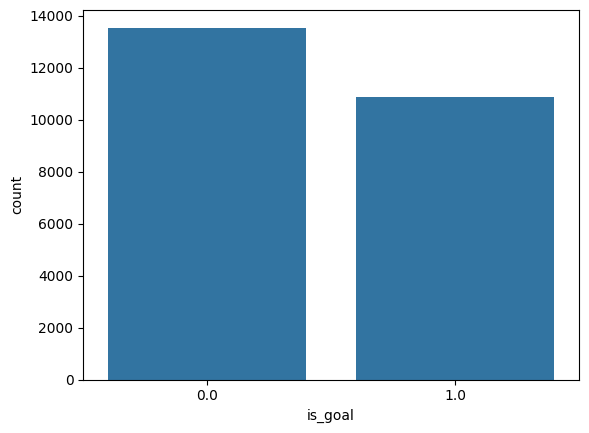

In [ ]:
import seaborn as sns
sns.countplot(x = data["is_goal"])

In [ ]:
data["is_goal"].fillna(value = 0.0,inplace = True)

In [ ]:
data.isnull().sum()

match_event_id           0
location_x               0
location_y               0
remaining_min            0
power_of_shot            0
knockout_match           0
game_season              0
remaining_sec            0
distance_of_shot         0
is_goal                  0
area_of_shot             0
shot_basics              0
range_of_shot            0
team_name                0
date_of_game             0
home/away                0
shot_id_number           0
lat/lng                  0
type_of_shot             0
type_of_combined_shot    0
match_id                 0
team_id                  0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x = data.drop(['is_goal'],axis=1)
y = data[['is_goal']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accu=accuracy_score(y_test,prediction)
print(prediction)
print(accu)

[1. 0. 0. ... 1. 1. 1.]
0.5557003257328991
